In [105]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import pickle
from sklearn.metrics import plot_confusion_matrix
from builtins import range
from builtins import object
from resizeimage import resizeimage
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [9]:
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

# FILE_NAME = "train.csv"
FILE_NAME = "icml_face_data.csv"
# FILE_NAME = "face_augmentated_3.csv"


IMAGES_FOR_TESTING = "data/Images_for_testing/"

In [24]:
data_path = ["data"]
file_path = os.sep.join(data_path + [FILE_NAME])

data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust

In [109]:
def getModelNames(directory):
    names = []
    for pth in Path(directory).iterdir():
        names.append(str(pth))
    return names

In [42]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data[" pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [43]:
def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [110]:
X,y = data_X_y(data_exclude_disgust)
X = reshape_X(X)
names = getModelNames('models/')


In [144]:
def retrieveGoodModels():
    goodmodels = []
    for name in names:
        loaded_model = pickle.load(open(name, 'rb'))
        y_pred = loaded_model.predict(X)

        score = accuracy_score(y, y_pred)
        score = score*100
        
        if (score > 40):
            goodmodels.append(name)
            print("Adding model to goodmodels")
            
    return goodmodels


#     print(classification_report(y, y_pred))
#     plot_confusion_matrix(loaded_model, X, y, display_labels = CLASS_NAMES_WITHOUT_DISGUST)

In [156]:
goodmodels = retrieveGoodModels()
if len(goodmodels) > 0:
    print(goodmodels,"\nAmount of good models loaded:",len(goodmodels))
else:
    print("Something went wrong, no good models found")

Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
Adding model to goodmodels
['models\\35.63%_Ros_SGD', 'models\\36.27%_Smote_SGD', 'models\\36.65%_Smote_SGD', 'models\\36.81%_Ros_SGD', 'models\\37.34%_Ros_SGD', 'models\\38.05%_Ros_SGD', 'models\\38.05%_Smote_SGD', 'models\\39.1%_Smote_SGD', 'models\\39.48%_Smote_SGD', 'models\\39.72%_Ros_SGD'] 
Amount of good models loaded: 10


In [157]:
def testModels(modelname):

    loaded_model = pickle.load(open(modelname, 'rb'))
    y_pred = loaded_model.predict(X)

    score = accuracy_score(y, y_pred)
    score = score*100
    score = str(round(score, 2)) 

    print("Accuracy is: ", score)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(loaded_model, X, y, display_labels = CLASS_NAMES_WITHOUT_DISGUST)

Accuracy is:  40.85
              precision    recall  f1-score   support

           0       0.41      0.21      0.28      4946
           2       0.45      0.09      0.16      5120
           3       0.40      0.80      0.53      8988
           4       0.39      0.27      0.32      6076
           5       0.45      0.60      0.52      4001
           6       0.41      0.27      0.33      6197

    accuracy                           0.41     35328
   macro avg       0.42      0.37      0.35     35328
weighted avg       0.41      0.41      0.37     35328



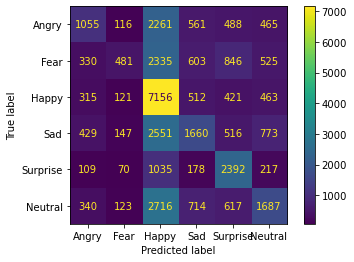

In [159]:
testModels(goodmodels[0])

Accuracy is:  41.23
              precision    recall  f1-score   support

           0       0.50      0.12      0.19      4946
           2       0.33      0.34      0.33      5120
           3       0.41      0.75      0.53      8988
           4       0.47      0.16      0.24      6076
           5       0.58      0.48      0.53      4001
           6       0.37      0.42      0.39      6197

    accuracy                           0.41     35328
   macro avg       0.44      0.38      0.37     35328
weighted avg       0.43      0.41      0.38     35328



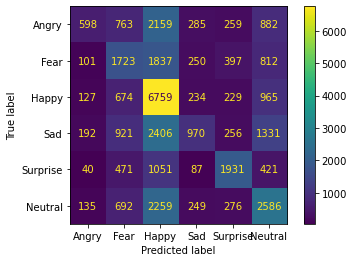

In [160]:
testModels(goodmodels[1])

Accuracy is:  40.54
              precision    recall  f1-score   support

           0       0.30      0.48      0.37      4946
           2       0.44      0.15      0.23      5120
           3       0.48      0.62      0.54      8988
           4       0.52      0.10      0.17      6076
           5       0.58      0.42      0.49      4001
           6       0.33      0.52      0.41      6197

    accuracy                           0.41     35328
   macro avg       0.44      0.38      0.37     35328
weighted avg       0.44      0.41      0.38     35328



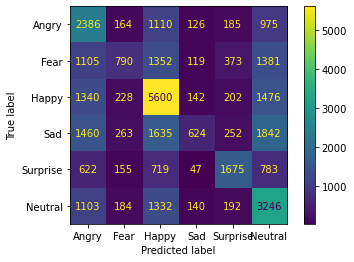

In [161]:
testModels(goodmodels[2])

Accuracy is:  41.77
              precision    recall  f1-score   support

           0       0.43      0.18      0.25      4946
           2       0.33      0.33      0.33      5120
           3       0.42      0.76      0.54      8988
           4       0.39      0.32      0.35      6076
           5       0.50      0.57      0.53      4001
           6       0.50      0.19      0.28      6197

    accuracy                           0.42     35328
   macro avg       0.43      0.39      0.38     35328
weighted avg       0.43      0.42      0.39     35328



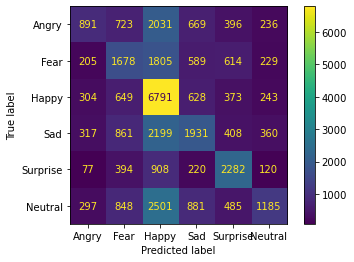

In [162]:
testModels(goodmodels[3])

Accuracy is:  40.33
              precision    recall  f1-score   support

           0       0.47      0.11      0.18      4946
           2       0.33      0.23      0.27      5120
           3       0.46      0.67      0.55      8988
           4       0.41      0.23      0.29      6076
           5       0.35      0.72      0.47      4001
           6       0.37      0.35      0.36      6197

    accuracy                           0.40     35328
   macro avg       0.40      0.39      0.36     35328
weighted avg       0.41      0.40      0.37     35328



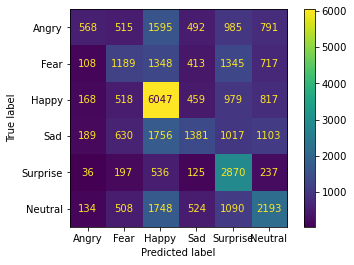

In [163]:
testModels(goodmodels[4])

Accuracy is:  40.94
              precision    recall  f1-score   support

           0       0.47      0.21      0.29      4946
           2       0.29      0.46      0.35      5120
           3       0.62      0.43      0.51      8988
           4       0.30      0.53      0.39      6076
           5       0.60      0.47      0.53      4001
           6       0.42      0.34      0.38      6197

    accuracy                           0.41     35328
   macro avg       0.45      0.41      0.41     35328
weighted avg       0.46      0.41      0.41     35328



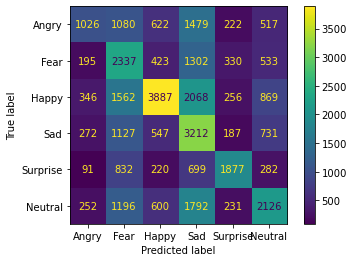

In [164]:
testModels(goodmodels[5])

Accuracy is:  40.67
              precision    recall  f1-score   support

           0       0.36      0.29      0.32      4946
           2       0.51      0.08      0.14      5120
           3       0.50      0.58      0.54      8988
           4       0.32      0.39      0.35      6076
           5       0.43      0.57      0.49      4001
           6       0.35      0.44      0.39      6197

    accuracy                           0.41     35328
   macro avg       0.41      0.39      0.37     35328
weighted avg       0.42      0.41      0.39     35328



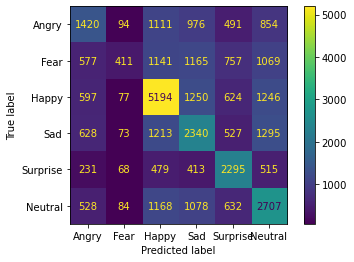

In [165]:
testModels(goodmodels[6])

Accuracy is:  41.25
              precision    recall  f1-score   support

           0       0.41      0.24      0.30      4946
           2       0.30      0.39      0.34      5120
           3       0.53      0.58      0.55      8988
           4       0.31      0.42      0.36      6076
           5       0.54      0.42      0.48      4001
           6       0.44      0.31      0.36      6197

    accuracy                           0.41     35328
   macro avg       0.42      0.39      0.40     35328
weighted avg       0.43      0.41      0.41     35328



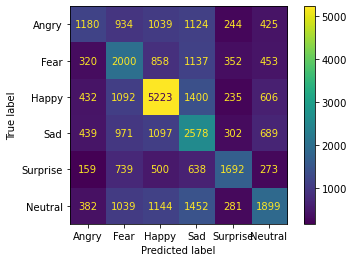

In [166]:
testModels(goodmodels[7])

Accuracy is:  40.38
              precision    recall  f1-score   support

           0       0.39      0.28      0.32      4946
           2       0.31      0.33      0.32      5120
           3       0.56      0.49      0.53      8988
           4       0.44      0.19      0.27      6076
           5       0.44      0.54      0.48      4001
           6       0.32      0.56      0.40      6197

    accuracy                           0.40     35328
   macro avg       0.41      0.40      0.39     35328
weighted avg       0.42      0.40      0.40     35328



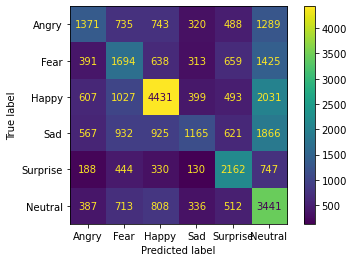

In [167]:
testModels(goodmodels[8])

Accuracy is:  41.98
              precision    recall  f1-score   support

           0       0.37      0.29      0.32      4946
           2       0.36      0.24      0.29      5120
           3       0.54      0.55      0.54      8988
           4       0.35      0.41      0.38      6076
           5       0.39      0.71      0.50      4001
           6       0.43      0.31      0.36      6197

    accuracy                           0.42     35328
   macro avg       0.41      0.42      0.40     35328
weighted avg       0.42      0.42      0.41     35328



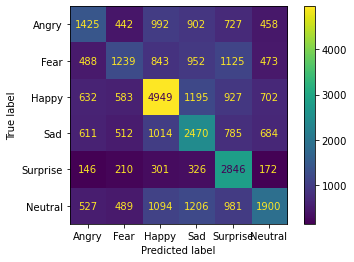

In [168]:
testModels(goodmodels[9])

In [171]:
from resizeimage import resizeimage
from PIL import Image, ImageOps

def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image

In [172]:
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
def testImages(imageName):


    loaded_model1 = pickle.load(open(goodmodels[0], 'rb'))
    loaded_model2 = pickle.load(open(goodmodels[1], 'rb'))
    loaded_model3 = pickle.load(open(goodmodels[2], 'rb'))
    loaded_model4 = pickle.load(open(goodmodels[3], 'rb'))
    loaded_model5 = pickle.load(open(goodmodels[4], 'rb'))
    loaded_model6 = pickle.load(open(goodmodels[5], 'rb'))
    loaded_model7 = pickle.load(open(goodmodels[6], 'rb'))
    loaded_model8 = pickle.load(open(goodmodels[7], 'rb'))
    loaded_model9 = pickle.load(open(goodmodels[8], 'rb'))
    loaded_model10 = pickle.load(open(goodmodels[9], 'rb'))
    
    test_image = import_test_sample(IMAGES_FOR_TESTING + imageName)
    
    y_pred1 = loaded_model1.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred1[0]])
    
    y_pred2 = loaded_model2.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred2[0]])
    
    y_pred3 = loaded_model3.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred3[0]])
    
    y_pred4 = loaded_model4.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred4[0]])
    
    y_pred5 = loaded_model5.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred5[0]])
    
    y_pred6 = loaded_model6.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred6[0]])
    
    y_pred7 = loaded_model7.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred7[0]])
    
    y_pred8 = loaded_model8.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred8[0]])
    
    y_pred9 = loaded_model9.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred9[0]])
    
    y_pred10 = loaded_model10.predict(np.reshape(test_image, (1, 2304)))
    print(CLASS_NAMES[y_pred10[0]])



Testing angry..
(48, 48, 1)
Happy
Happy
Happy
Happy
Happy
Neutral
Neutral
Neutral
Happy
Neutral


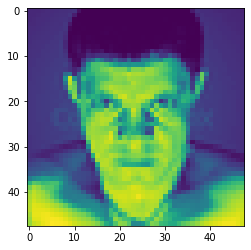

In [173]:
print("Testing angry..")
testImages("angry1.jpg")

Testing angry..
(48, 48, 1)
Happy
Happy
Angry
Surprise
Surprise
Sad
Surprise
Angry
Angry
Angry


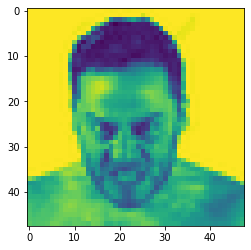

In [174]:
print("Testing angry..")
testImages("angry2.jpg")

Testing fear..
(48, 48, 1)
Sad
Happy
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad


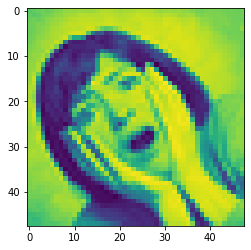

In [175]:
print("Testing fear..")
testImages("fear1.jpg")

Testing fear..
(48, 48, 1)
Sad
Neutral
Angry
Sad
Sad
Sad
Neutral
Neutral
Neutral
Sad


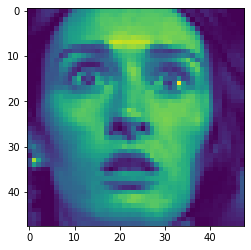

In [176]:
print("Testing fear..")
testImages("fear2.jpg")

Testing happy..
(48, 48, 1)
Happy
Fear
Neutral
Surprise
Surprise
Fear
Sad
Fear
Fear
Sad


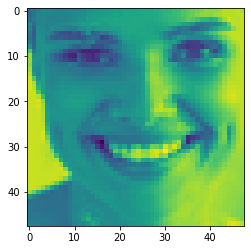

In [177]:
print("Testing happy..")
testImages("happy1.jpg")

Testing happy..
(48, 48, 1)
Neutral
Neutral
Neutral
Happy
Neutral
Sad
Angry
Sad
Neutral
Surprise


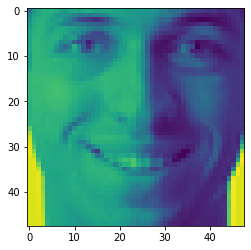

In [178]:
print("Testing happy..")
testImages("happy2.jpg")

Testing sad..
(48, 48, 1)
Happy
Happy
Angry
Happy
Happy
Angry
Happy
Happy
Neutral
Happy


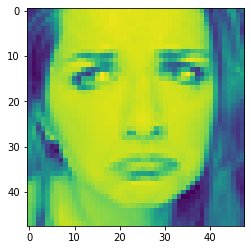

In [179]:
print("Testing sad..")
testImages("sad1.jpg")

Testing sad..
(48, 48, 1)
Happy
Happy
Happy
Happy
Surprise
Fear
Neutral
Fear
Fear
Surprise


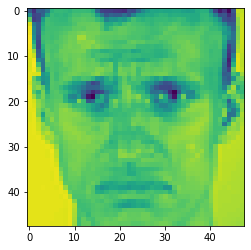

In [180]:
print("Testing sad..")
testImages("sad2.jpg")

Testing suprise..
(48, 48, 1)
Happy
Neutral
Neutral
Fear
Neutral
Fear
Neutral
Fear
Neutral
Fear


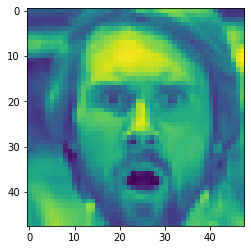

In [181]:
print("Testing suprise..")
testImages("suprise1.jpg")

Testing suprise..
(48, 48, 1)
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry


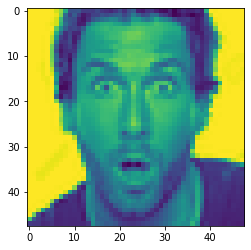

In [182]:
print("Testing suprise..")
testImages("suprise2.jpg")

Testing neutral..
(48, 48, 1)
Happy
Happy
Happy
Happy
Happy
Sad
Sad
Sad
Happy
Sad


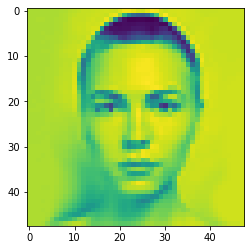

In [183]:
print("Testing neutral..")
testImages("neutral1.jpg")

Testing neutral..
(48, 48, 1)
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy


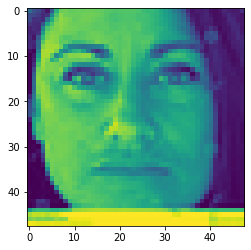

In [184]:
print("Testing neutral..")
testImages("neutral2.jpg")

In [185]:
file_path = os.sep.join(data_path + ['icml_face_data.csv'])
data_test = pd.read_csv(file_path)
test = ["PrivateTest", "PublicTest"]
data_test = data_test[data_test[' Usage'].isin(test) ]

# If icml_face_data.csv is used
data_test.drop(' Usage', axis=1, inplace=True)

data_test.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [186]:
data_test = data_test[data_test['emotion'] != 1] # Drops the emotion Disgust
data_test = data_test.replace({
2 : 1,
3 : 2,
4 : 3,
5 : 4,
6 : 5
})
data_test.shape, data_test.emotion.unique()

((7067, 2), array([0, 3, 5, 2, 1, 4], dtype=int64))

In [27]:
X_test, y_test = data_X_y(data_test)
print(X_test.shape)
X_test = reshape_X(X_test)
print(X_test.shape)

(7067, 48, 48, 1)
(7067, 2304)


In [187]:
modelname = 'rosParams_hinge,elasticnet,False,True,False,True'

loaded_model = pickle.load(open(modelname, 'rb'))
y_pred = loaded_model.predict(X_test)

score = accuracy_score(y_test, y_pred)
score = score*100
score = str(round(score, 2)) 

print("Accuracy is: ", score)

plot_confusion_matrix(loaded_model, X, y, display_labels = CLASS_NAMES_WITHOUT_DISGUST)

FileNotFoundError: [Errno 2] No such file or directory: 'rosParams_hinge,elasticnet,False,True,False,True'

In [11]:
def testNewModels(testImage):
    modelnames = ['rosParams_hinge,elasticnet,True,True,False,True', 'rosParams_hinge,l2,False,True,False,True', 'rosParams_hinge,l2,True,True,False,True', 'rosParams_log,elasticnet,False,True,False,True', 'rosParams_log,elasticnet,True,True,False,False', 'rosParams_log,elasticnet,True,True,False,True', 'rosParams_log,l1,True,False,False,False', 'rosParams_log,l1,True,False,False,True', 'rosParams_log,l2,False,True,False,False', 'rosParams_log,l2,True,True,False,True', 'rosParams_modified_huber,l1,True,True,False,True']
    results = []
    
    for i in modelnames:
        loaded_model = pickle.load(open('models/'+i, 'rb'))
        test_image = import_test_sample(IMAGES_FOR_TESTING + testImage)
        y_pred = loaded_model.predict(np.reshape(test_image, (1, 2304)))
        
        result = CLASS_NAMES_WITHOUT_DISGUST[y_pred[0]]

        results.append(str(result))
    print("Testing",testImage,'...')
    print(results)
        

Testing happy2.jpg ...
['Neutral', 'Surprise', 'Happy', 'Surprise', 'Angry', 'Happy', 'Sad', 'Sad', 'Happy', 'Angry', 'Surprise']
Testing fear2.jpg ...
['Angry', 'Surprise', 'Happy', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Neutral']
Testing angry2.jpg ...
['Surprise', 'Surprise', 'Angry', 'Surprise', 'Surprise', 'Happy', 'Sad', 'Sad', 'Angry', 'Sad', 'Surprise']
Testing sad2.jpg ...
['Surprise', 'Surprise', 'Happy', 'Surprise', 'Surprise', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Surprise']
Testing neutral2.jpg ...
['Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Happy']
Testing suprise2.jpg ...
['Angry', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Happy', 'Happy', 'Angry']


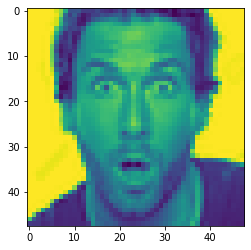

In [13]:
testNewModels("happy2.jpg")
testNewModels("fear2.jpg")
testNewModels("angry2.jpg")
testNewModels("sad2.jpg")
testNewModels("neutral2.jpg")
testNewModels("suprise2.jpg")